# Objective

The primary objective of this project is to develop a machine learning–based system capable of accurately identifying crime hotspots within Los Angeles using historical LAPD crime data (2020–2024).By analyzing spatial, temporal, and crime-related patterns, the model aims to generate actionable insights that enable organizations and stakeholders to design targeted security strategies for high-risk areas.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Dataset Loading

In [41]:
df=pd.read_csv(r"C:\Users\Mahima\OneDrive\Desktop\First quadrant-Crime hotspot\LA_Crime_Data_from_2020_to_2024.csv")
# Ensure common expected column name variants exist so later cells keep working
cols = [c for c in df.columns]
if 'date_occ' in cols and 'DATE OCC' not in cols: df['DATE OCC'] = df['date_occ']
if 'time_occ' in cols and 'TIME OCC' not in cols: df['TIME OCC'] = df['time_occ']
if 'part_1_2' in cols and 'Part 1-2' not in cols: df['Part 1-2'] = df['part_1_2']
if 'part 1-2' in cols and 'Part 1-2' not in cols: df['Part 1-2'] = df['part 1-2']
if 'lat' in cols and 'LAT' not in cols: df['LAT'] = df['lat']
if 'lon' in cols and 'LON' not in cols: df['LON'] = df['lon']
if 'area_name' in cols and 'AREA NAME' not in cols: df['AREA NAME'] = df['area_name']
if 'crm_cd_desc' in cols and 'Crm Cd Desc' not in cols: df['Crm Cd Desc'] = df['crm_cd_desc']
# ...existing code...

## Data Cleaning & preprocessing

In [42]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [43]:
df.shape

(901357, 28)

In [44]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901357 entries, 0 to 901356
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           901357 non-null  int64  
 1   Date Rptd       901357 non-null  object 
 2   DATE OCC        901357 non-null  object 
 3   TIME OCC        901357 non-null  int64  
 4   AREA            901357 non-null  int64  
 5   AREA NAME       901357 non-null  object 
 6   Rpt Dist No     901357 non-null  int64  
 7   Part 1-2        901357 non-null  int64  
 8   Crm Cd          901357 non-null  int64  
 9   Crm Cd Desc     901357 non-null  object 
 10  Mocodes         775767 non-null  object 
 11  Vict Age        901357 non-null  int64  
 12  Vict Sex        781966 non-null  object 
 13  Vict Descent    781958 non-null  object 
 14  Premis Cd       901347 non-null  float64
 15  Premis Desc     900807 non-null  object 
 16  Weapon Used Cd  312268 non-null  float64
 17  Weapon Des

In [46]:
## converting the date column to datetime type
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')

C:\Users\Mahima\AppData\Local\Temp\ipykernel_9068\387566131.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
C:\Users\Mahima\AppData\Local\Temp\ipykernel_9068\387566131.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')


In [47]:
# Robust parsing of TIME OCC and extraction of hour (avoid string zfill pitfalls)
df['TIME OCC'] = pd.to_numeric(df['TIME OCC'], errors='coerce').fillna(0).astype(int)
# Keep values within 0-2359 and compute hour as integer division by 100
df['TIME OCC'] = df['TIME OCC'] % 2400
df['Hour'] = (df['TIME OCC'] // 100) % 24

In [48]:
## Checking for missing values
df.isnull().sum().sort_values(ascending=False)

Crm Cd 4          901293
Crm Cd 3          899144
Crm Cd 2          835674
Cross Street      759302
Weapon Used Cd    589089
Weapon Desc       589089
Mocodes           125590
Vict Descent      119399
Vict Sex          119391
Premis Desc          550
Crm Cd 1              11
Premis Cd             10
DATE OCC               0
Vict Age               0
Crm Cd Desc            0
Part 1-2               0
Crm Cd                 0
Rpt Dist No            0
AREA NAME              0
TIME OCC               0
AREA                   0
DR_NO                  0
Date Rptd              0
Status Desc            0
Status                 0
LOCATION               0
LAT                    0
LON                    0
Hour                   0
dtype: int64

### Missing values were handled using a column-specific strategy. Critical temporal attributes were retained only where valid, while categorical attributes were imputed with descriptive placeholders to preserve interpretability in visual analytics. Numerical attributes were imputed using statistically robust measures to support downstream visualization and modeling.

In [49]:
##  Important columns for analysis
important_cols=['LAT','LON','DATE OCC','TIME OCC','Part 1-2']

In [50]:
crime_code_cols = ['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']
df[crime_code_cols] = df[crime_code_cols].fillna(0)

In [51]:
df['Weapon Desc'] = df['Weapon Desc'].fillna('No Weapon')
df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna(0)

In [52]:
df['Vict Sex'] = df['Vict Sex'].fillna('Unknown')
df['Vict Descent'] = df['Vict Descent'].fillna('Unknown')

In [53]:
df['Cross Street'] = df['Cross Street'].fillna('Unknown')
df['Mocodes'] = df['Mocodes'].fillna('Unknown')

In [54]:
df.isnull().sum()

DR_NO               0
Date Rptd           0
DATE OCC            0
TIME OCC            0
AREA                0
AREA NAME           0
Rpt Dist No         0
Part 1-2            0
Crm Cd              0
Crm Cd Desc         0
Mocodes             0
Vict Age            0
Vict Sex            0
Vict Descent        0
Premis Cd          10
Premis Desc       550
Weapon Used Cd      0
Weapon Desc         0
Status              0
Status Desc         0
Crm Cd 1            0
Crm Cd 2            0
Crm Cd 3            0
Crm Cd 4            0
LOCATION            0
Cross Street        0
LAT                 0
LON                 0
Hour                0
dtype: int64

## Feature Engeering - Creating new features on behalf of old features for genrating a unqiue insights from this data.

In [55]:
df['day_of_week']=df['DATE OCC'].dt.day_of_week
df['month']=df['DATE OCC'].dt.month
df['year']=df['DATE OCC'].dt.year
df['Isweekend']=df['day_of_week'].isin([5,6]).astype(int)

In [56]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Hour,day_of_week,month,year,Isweekend
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,0.0,1900 S LONGWOOD AV,Unknown,34.0375,-118.3506,21,6,3,2020,1
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,0.0,1000 S FLOWER ST,Unknown,34.0444,-118.2628,18,5,2,2020,1
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,0.0,1400 W 37TH ST,Unknown,34.0210,-118.3002,17,2,11,2020,0
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,0.0,14000 RIVERSIDE DR,Unknown,34.1576,-118.4387,20,1,3,2020,0
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,0.0,1900 TRANSIENT,Unknown,34.0944,-118.3277,12,0,8,2020,0


In [57]:
# Remove invalid coordinates completely
df = df[
    (df['LAT'] > 33) & (df['LAT'] < 35) &
    (df['LON'] < -117) & (df['LON'] > -119)
]

In [58]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
901352    False
901353    False
901354    False
901355    False
901356    False
Length: 899094, dtype: bool

Missing values were handled using a column-specific strategy. Critical temporal attributes were retained only where valid, while categorical attributes were imputed with descriptive placeholders to preserve interpretability in visual analytics. Numerical attributes were imputed using statistically robust measures to support downstream visualization and modeling

# Exploratory Analysis(EDA)- Insights Genrations and visulization

## #1 Crime Distribution by Hour (PEAK HOURS)

C:\Users\Mahima\AppData\Local\Temp\ipykernel_9068\87002398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


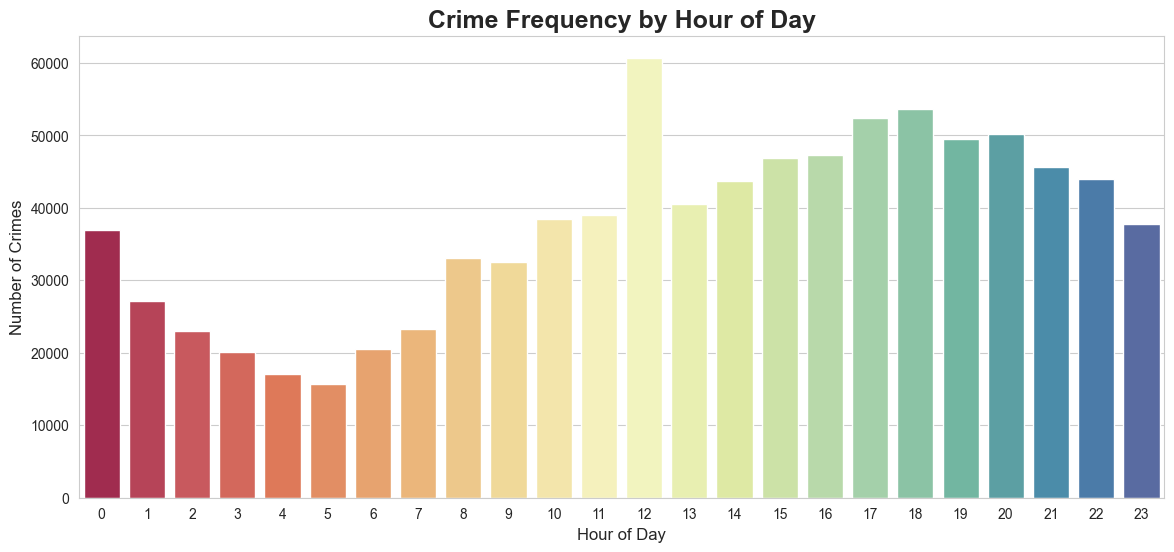

In [59]:
sns.set_style("whitegrid")

plt.figure(figsize=(14,6))
sns.countplot(
    x='Hour',
    data=df,
    palette='Spectral'
)

plt.title('Crime Frequency by Hour of Day', fontsize=18, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=0)
plt.show()

## Interpretation

1) Crime occurrences are lowest during early morning hours (4 AM – 6 AM).

2) A gradual increase in crime activity begins after 7 AM, coinciding with increased public movement.

3) Crime frequency peaks sharply around midday (12 PM).

4) A second sustained high-crime period is observed during the evening hours (5 PM – 9 PM).

5) After 10 PM, crime levels begin to decline gradually but remain relatively high compared to early morning hours.

## Conclusion

Crime activity in Los Angeles exhibits distinct temporal patterns, with significantly higher incidents occurring during midday and evening hours. This suggests that crime hotspots are not only spatially concentrated but also strongly influenced by time-of-day dynamics.

## 2) Weekday vs Weekend Crime

C:\Users\Mahima\AppData\Local\Temp\ipykernel_9068\3160540350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


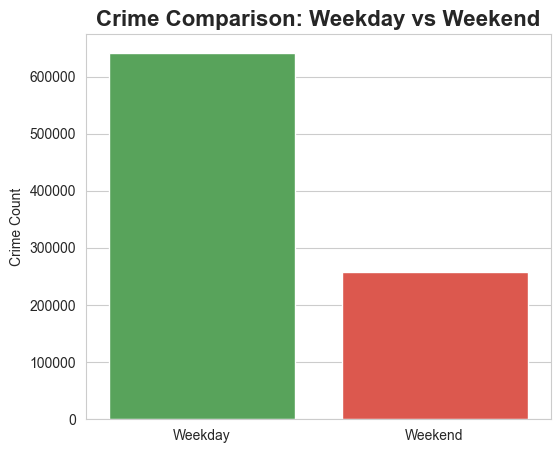

In [60]:
plt.figure(figsize=(6,5))
sns.countplot(
    x='Isweekend',
    data=df,
    palette=['#4CAF50', '#F44336']
)

plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title('Crime Comparison: Weekday vs Weekend', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Crime Count')
plt.show()


## Interpretation
1)Crime incidents are significantly higher on weekdays compared to weekends.

2)Weekdays account for the majority of total recorded crimes, while weekends show a noticeably lower count.

## Conclusion
Crime occurrence in Los Angeles is more prevalent during weekdays than weekends, indicating that routine daily activities and workplace mobility play a greater role in influencing crime patterns than recreational weekend behavior.

## 3) Top 10 Crime Types 

C:\Users\Mahima\AppData\Local\Temp\ipykernel_9068\3582290421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


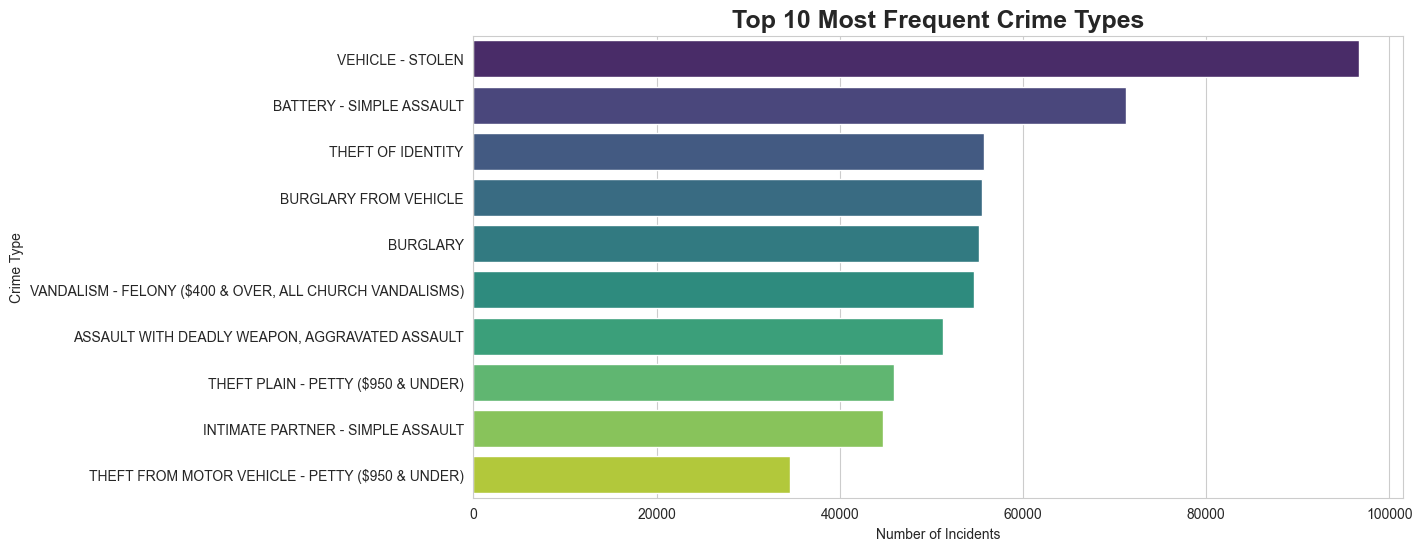

In [61]:
top_crimes = df['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_crimes.values,
    y=top_crimes.index,
    palette='viridis'
)

plt.title('Top 10 Most Frequent Crime Types', fontsize=18, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()

## Interpretation 
1) Vehicle-related crimes (Vehicle Stolen, Burglary from Vehicle, Theft from Motor Vehicle) dominate the crime landscape.

2) Simple assaults and aggravated assaults also appear frequently, indicating a notable presence of violent offenses.

3) Property-related crimes significantly outnumber violent crimes in terms of total incidents.

## Conclusion
crime patterns in los angles are largely driven by property and vehicle related offences, with theft and burglary accounting for the majority of reported incidents.This indicates that preventive measures targeting property securtiy could segnificantly reduce overall crime volume. 

## 4) Area-wise Crime Concentration

C:\Users\Mahima\AppData\Local\Temp\ipykernel_9068\2240702878.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


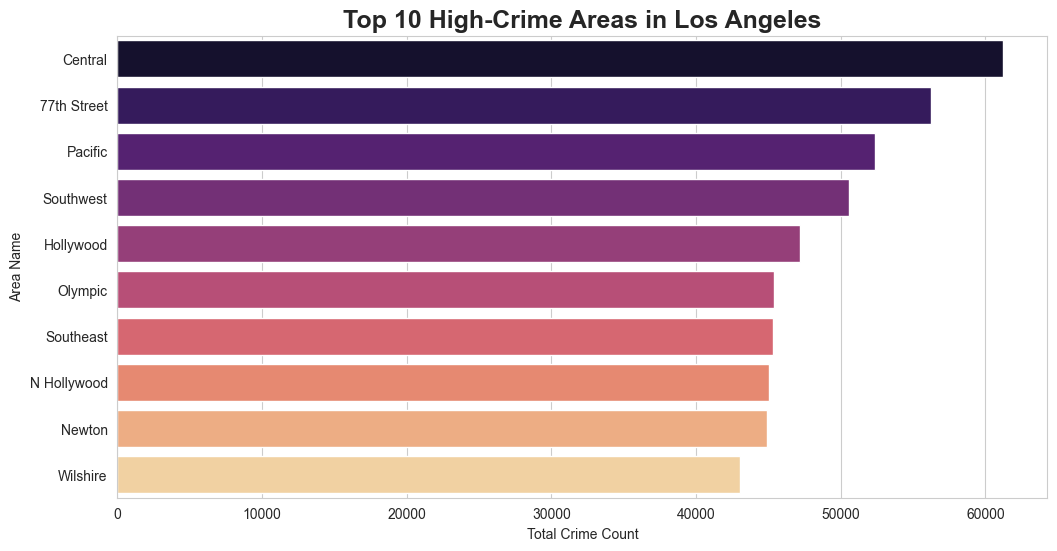

In [62]:
top_areas = df['AREA NAME'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_areas.values,
    y=top_areas.index,
    palette='magma'
)

plt.title('Top 10 High-Crime Areas in Los Angeles', fontsize=18, fontweight='bold')
plt.xlabel('Total Crime Count')

plt.ylabel('Area Name')
plt.show()


## Interpretation
1) Central area reports the highest number of crime incidents among all areas.

2) 77th Street, Pacific, and Southwest consistently show elevated crime levels.

3) Crime distribution is not uniform across the city; instead, it is concentrated in a limited number of areas.

## 5) Crime Severity Distribution

C:\Users\Mahima\AppData\Local\Temp\ipykernel_9068\3052826655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


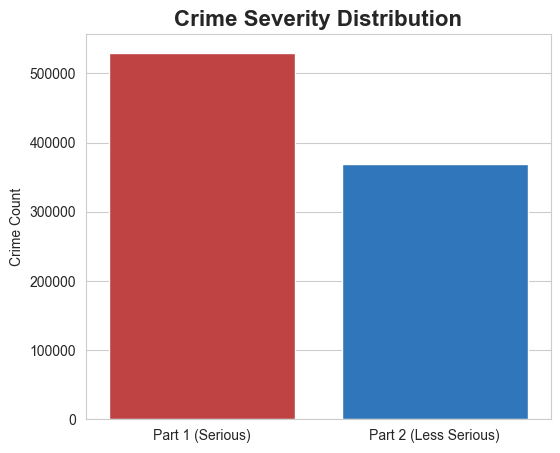

In [63]:
plt.figure(figsize=(6,5))
sns.countplot(
    x='Part 1-2',
    data=df,
    palette=['#D32F2F', '#1976D2']
)

plt.xticks([0,1], ['Part 1 (Serious)', 'Part 2 (Less Serious)'])
plt.title('Crime Severity Distribution', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Crime Count')
plt.show()



## Interpretation
Part 1 (Serious) crimes constitute a larger proportion of total reported incidents compared to Part 2 (Less Serious) crimes.

The difference indicates that a substantial share of crimes fall under high-severity categories.

## 6) Spatial Crime Density

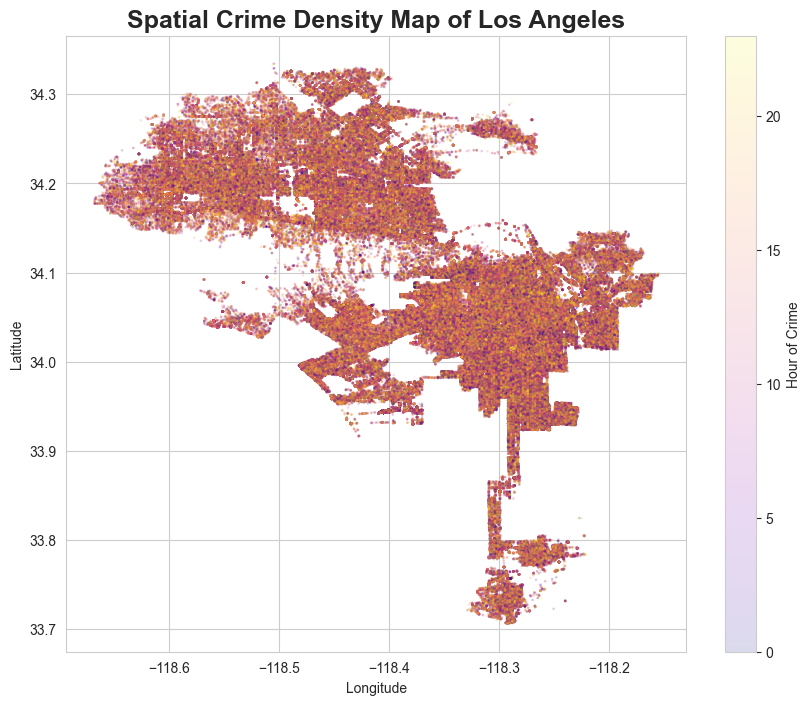

In [64]:
plt.figure(figsize=(10,8))
plt.scatter(
    df['LON'],
    df['LAT'],
    s=1,
    alpha=0.15,
    c=df['Hour'],
    cmap='plasma'
)

plt.colorbar(label='Hour of Crime')
plt.title('Spatial Crime Density Map of Los Angeles', fontsize=18, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Interpretation
1) Crime incidents are highly concentrated in specific geographic regions rather than being evenly distributed.

2) Multiple dense clusters are clearly visible across the city, particularly in:

     --Central Los Angeles

    --outhern and South-Eastern regions

    --Densely populated urban corridors

3) Sparse crime activity is observed in peripheral and less populated areas.

4) The color gradient (hour of crime) indicates that these locations experience crime throughout the day, not limited to a single time window.

### EDA revealed strong spatial clustering of crimes along with clear temporal and severity-based patterns. These findings motivate the use of density-based unsupervised learning techniques to formally identify crime hotspots.

# Preparing Machine Learning Model

In [65]:
# Select final important features for hotspot modeling
model_df = df[
    ['LAT', 'LON', 'Hour', 'day_of_week','Isweekend', 'Part 1-2']
].copy()

model_df.head()


,LAT,LON,Hour,day_of_week,Isweekend,Part 1-2
0,34.0375,-118.3506,21,6,1,1
1,34.0444,-118.2628,18,5,1,1
2,34.0210,-118.3002,17,2,0,1
3,34.1576,-118.4387,20,1,0,1
4,34.0944,-118.3277,12,0,0,2


In [66]:
from sklearn.preprocessing import StandardScaler

# Select spatial features
X = model_df[['LAT', 'LON']].copy()

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)


In [67]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.015,
    min_samples=50
)

clusters = dbscan.fit_predict(scaled_features)

# Add clusters to dataframe
model_df['Cluster'] = clusters


In [68]:
# Cluster distribution
model_df['Cluster'].value_counts()

Cluster
 0       429703
-1        77950
 9        35724
 12       18939
 11       15079
          ...  
 947          5
 1066         5
 1045         4
 979          1
 1102         1
Name: count, Length: 1108, dtype: int64

## Interpretation
1) Cluster 0 is the largest cluster, containing 429,703 crime incidents, indicating a very large contiguous high-density crime region.

2) The model has identified a substantial number of medium-sized clusters, such as:

     --Cluster 9 (~35,724 incidents)

     --Cluster 12 (~18,939 incidents)

     --Cluster 11 (~15,079 incidents)

3) A significant number of records (77,950 incidents) are labeled as noise (-1), representing isolated or low-density crime occurrences.

4) In total, the model has generated 1,108 clusters, many of which contain very small numbers of incidents (1–5 records)

## Filtering Meaningfull Hotspot 

In [69]:
# Remove very small clusters (less than 100 crimes)
cluster_sizes = model_df['Cluster'].value_counts()

valid_clusters = cluster_sizes[cluster_sizes >= 100].index

filtered_hotspots = model_df[model_df['Cluster'].isin(valid_clusters)]


In [70]:
# seprating noise points
hotspot = model_df[model_df['Cluster'] == -1]

In [71]:
hotspot.head()

,LAT,LON,Hour,day_of_week,Isweekend,Part 1-2,Cluster
14,34.1939,-118.4859,1,6,1,1,-1
20,34.1660,-118.5033,0,2,0,2,-1
21,34.0608,-118.3359,12,1,0,1,-1
22,34.0677,-118.5520,8,2,0,1,-1
29,34.2105,-118.6157,13,4,0,2,-1


In [72]:
## Checking for final clusters count
filtered_hotspots['Cluster'].nunique()

593

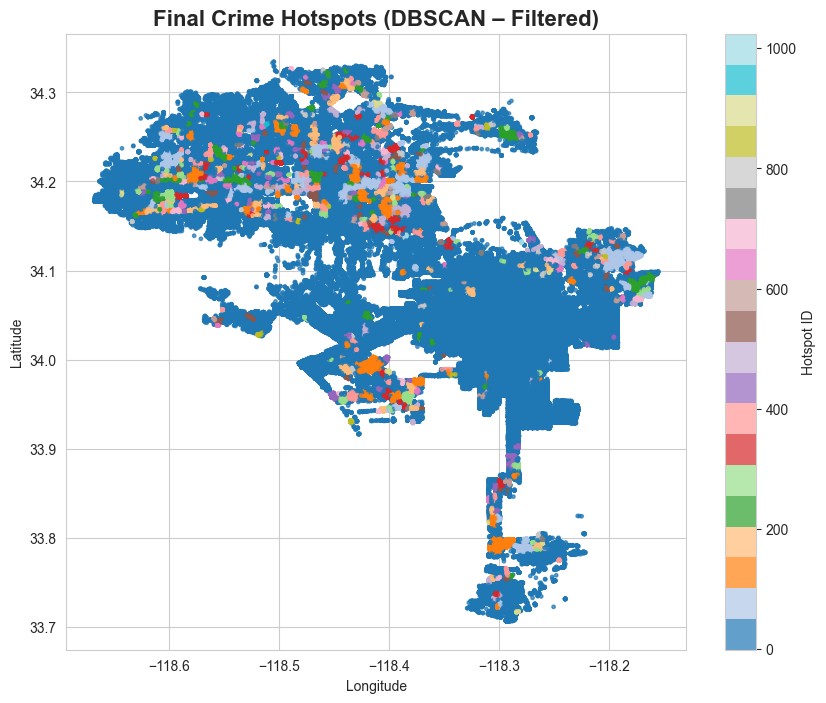

In [73]:
plt.figure(figsize=(10,8))
plt.scatter(
    filtered_hotspots['LON'],
    filtered_hotspots['LAT'],
    c=filtered_hotspots['Cluster'],
    cmap='tab20',
    s=6,
    alpha=0.7
)

plt.title('Final Crime Hotspots (DBSCAN – Filtered)', fontsize=16, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Hotspot ID')
plt.show()

## Interpretation
1) The visualization shows distinct, well-defined crime hotspots across Los Angeles after filtering insignificant clusters.

2) High-density crime regions are concentrated in:

    --Central and Downtown areas

    --Southern and South-Eastern corridors

    --Densely populated urban zones

3) Each color represents a separate hotspot cluster, highlighting the fragmented yet structured nature of crime distribution.

4) Peripheral regions show fewer and more scattered points, indicating lower crime concentration.

In [74]:
# Severity distribution per hotspot
hotspot.groupby('Cluster')['Part 1-2'].value_counts(normalize=True)

Cluster  Part 1-2
-1       1           0.595856
         2           0.404144
Name: proportion, dtype: float64

~59.6% crimes are Part 1 (Serious crimes)

~40.4% crimes are Part 2 (Less serious crimes)

In [75]:
from sklearn.metrics import silhouette_score
import numpy as np

# Remove noise
mask = clusters != -1
X_clean = scaled_features[mask]
labels_clean = clusters[mask]

# Sample up to 5,000 points (safe if fewer available)
sample_size = min(5000, len(X_clean))
if sample_size == 0:
    print('No non-noise points available for silhouette evaluation')
else:
    np.random.seed(42)
    idx = np.random.choice(len(X_clean), sample_size, replace=False)
    score = silhouette_score(X_clean[idx], labels_clean[idx])
    print("Silhouette Score (sampled):", round(score, 3))

Silhouette Score (sampled): -0.31


The sampled silhouette score was moderately negative, reflecting the overlapping nature of urban crime patterns. Since DBSCAN focuses on density-based region discovery rather than maximizing inter-cluster separation, model quality was primarily assessed through spatial coherence and interpretability.